In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector=inspect(engine)

In [7]:
tables=inspector.get_table_names()
tables

['measurement', 'station']

In [8]:
columns_measurement=inspector.get_columns(tables[0])
for rows in columns_measurement:
    print(rows['name'], rows['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns_station=inspector.get_columns(tables[1])
for rows in columns_station:
    print(rows['name'], rows['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
engine.execute('Select * from measurement').fetchmany(5)

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
engine.execute('Select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [17]:
# Calculate the date 1 year ago from the last data point in the database
target_date= dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(target_date)

2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores
date_prec=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= target_date).all()
date_prec

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(date_prec)
df.set_index('date', inplace=True)
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [20]:
# Sort the dataframe by date
df.sort_index(ascending=True, inplace=True)
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


Text(0.5,0,'date')

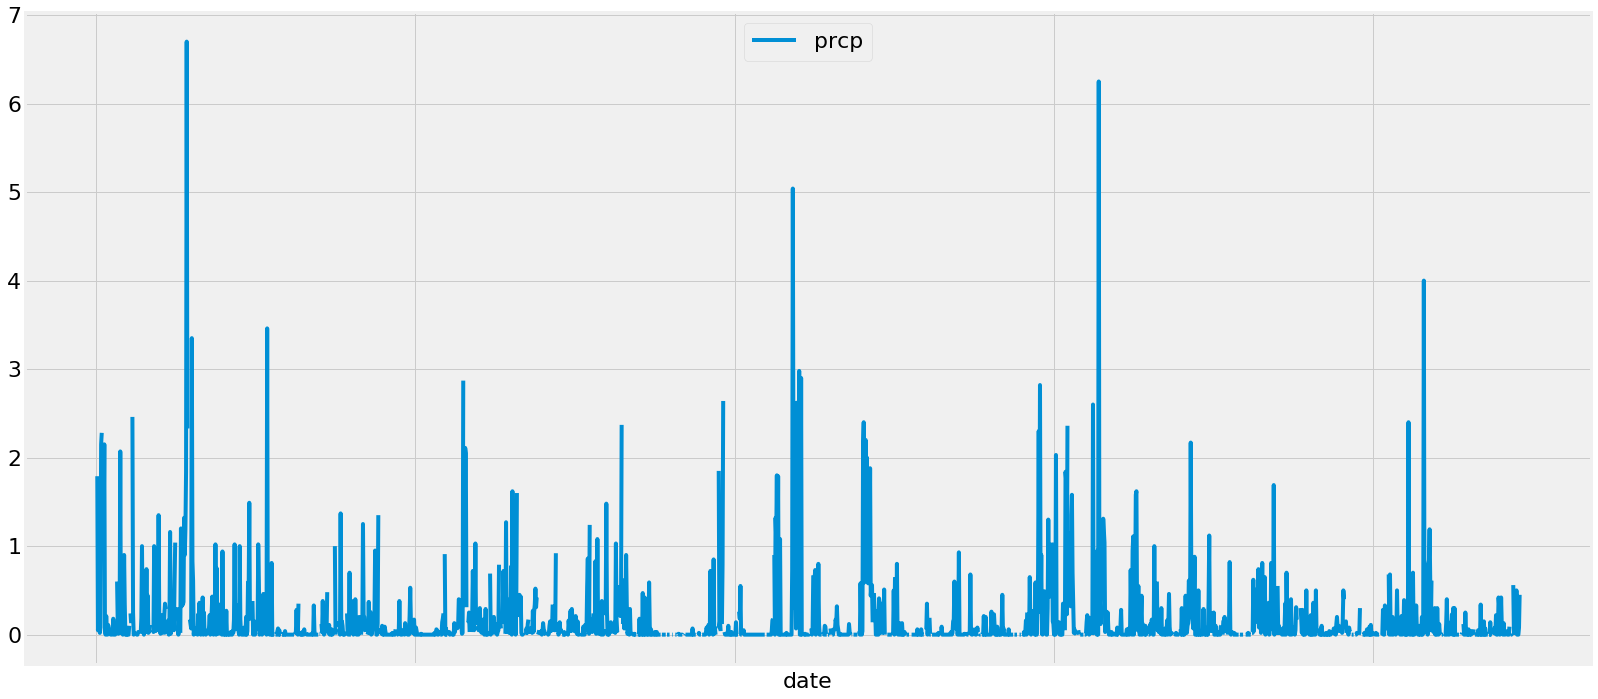

In [22]:
#fig1, ax1 = plt.subplots(figsize=(20,8))
df.plot(figsize=(25,12), fontsize=22)
plt.legend(loc=9, fontsize=22)
plt.xlabel('date', fontsize=22)

![precipitation](Images/precipitation.png)

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [24]:
# Design a query to show how many stations are available in this dataset?
number_stations=session.query(Station.station).count()
number_stations

9

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_most_active=session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station==active_stations[0][0]).all()

temp_most_active

[(85.0, 54.0, 71.66378066378067)]

In [27]:
# Choose the station with the highest number of temperature observations.
station_tobs=session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).first()
station_tobs

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_tobs= pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
                      filter(Measurement.date >= target_date).\
                      filter(Measurement.station==station_tobs[0]).all())

df_tobs.head()



,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


Text(0,0.5,'Frequency')

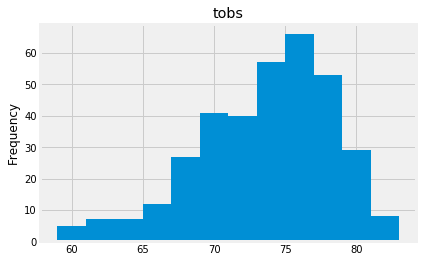

In [28]:
line, =pd.DataFrame.hist(df_tobs[['tobs']], bins=12)
plt.ylabel('Frequency')

![precipitation](Images/station-histogram.png)

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps=calc_temps('2017-02-10', '2017-02-26')
trip_temps

[(61.0, 70.65384615384616, 80.0)]

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
labels=['temp_min', 'temp_avg', 'temp_max']

df_trip=pd.DataFrame(trip_temps, columns=labels)
df_trip


,temp_min,temp_avg,temp_max
0,61.0,70.653846,80.0


In [32]:
yerr_min=df_trip['temp_avg']-df_trip['temp_min']
yerr_max=df_trip['temp_max']-df_trip['temp_avg']

Text(0.5,1,'Trip Average Temp')

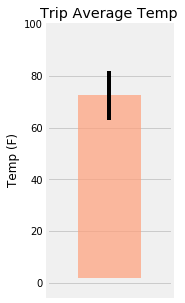

In [33]:
f, ax = plt.subplots(figsize=(2,5))
plt.bar(0, df_trip['temp_avg'], width=0.02, linewidth=0.1, bottom=2, color='lightsalmon', alpha=0.7,yerr=[yerr_min,yerr_max])
plt.xlim(-0.02, 0.02)
plt.ylim(-5, 100)
plt.grid(b=None, which='major', axis='x')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.title('Trip Average Temp')

In [34]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

prcp_station=session.query(Measurement.station,Station.name,Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
filter(Measurement.station==Station.station).\
filter(Measurement.date >= '2017-02-10').\
filter(Measurement.date <='2017-02-26').\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
prcp_station

#df_prcp_station=pd.DataFrame(prcp_station)
#df_prcp_station


[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  5.9799999999999995),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 5.83),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  5.739999999999998),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  5.09),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  3.3799999999999994),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  3.1699999999999995),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.17)]

## Optional Challenge Assignment

In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
out=daily_normals("01-01")

In [36]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.date(2017,2,10)
end_date = dt.date(2017,2,26)


# Use the start and end date to create a range of dates
travel_dates=[]
travel_dates_str=[]
while start_date <= end_date:
    travel_dates.append(start_date)
    travel_dates_str.append(start_date.strftime("%m-%d"))
    start_date += dt.timedelta(days=1)  

travel_dates
# Stip off the year and save a list of %m-%d strings




[datetime.date(2017, 2, 10),
 datetime.date(2017, 2, 11),
 datetime.date(2017, 2, 12),
 datetime.date(2017, 2, 13),
 datetime.date(2017, 2, 14),
 datetime.date(2017, 2, 15),
 datetime.date(2017, 2, 16),
 datetime.date(2017, 2, 17),
 datetime.date(2017, 2, 18),
 datetime.date(2017, 2, 19),
 datetime.date(2017, 2, 20),
 datetime.date(2017, 2, 21),
 datetime.date(2017, 2, 22),
 datetime.date(2017, 2, 23),
 datetime.date(2017, 2, 24),
 datetime.date(2017, 2, 25),
 datetime.date(2017, 2, 26)]

In [37]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals=[]
minimums=[]
averages=[]
maximums=[]

for dates in travel_dates_str:
    normals.append(daily_normals(dates))
    minimums.append(daily_normals(dates)[0][0])
    averages.append(daily_normals(dates)[0][1])
    maximums.append(daily_normals(dates)[0][2])

normals

[[(56.0, 68.41666666666667, 76.0)],
 [(61.0, 69.25, 79.0)],
 [(60.0, 69.15789473684211, 78.0)],
 [(58.0, 70.36206896551724, 80.0)],
 [(62.0, 70.89473684210526, 79.0)],
 [(56.0, 70.28813559322033, 79.0)],
 [(59.0, 70.48214285714286, 76.0)],
 [(62.0, 70.47272727272727, 77.0)],
 [(63.0, 70.79629629629629, 77.0)],
 [(60.0, 69.33962264150944, 77.0)],
 [(63.0, 70.14035087719299, 76.0)],
 [(63.0, 69.79629629629629, 76.0)],
 [(60.0, 70.15789473684211, 83.0)],
 [(62.0, 70.35593220338983, 81.0)],
 [(61.0, 68.56666666666666, 76.0)],
 [(61.0, 68.59649122807018, 76.0)],
 [(62.0, 69.89285714285714, 78.0)]]

In [38]:
#Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
df_normals= pd.DataFrame({'tmin':minimums, 'tavg':averages, 'tmax':maximums}, index=travel_dates)
df_normals

,tmin,tavg,tmax
2017-02-10,56.0,68.416667,76.0
2017-02-11,61.0,69.250000,79.0
2017-02-12,60.0,69.157895,78.0
2017-02-13,58.0,70.362069,80.0
2017-02-14,62.0,70.894737,79.0
2017-02-15,56.0,70.288136,79.0
2017-02-16,59.0,70.482143,76.0
2017-02-17,62.0,70.472727,77.0
2017-02-18,63.0,70.796296,77.0
2017-02-19,60.0,69.339623,77.0


Text(38.87,0.5,'Temperature (F)')

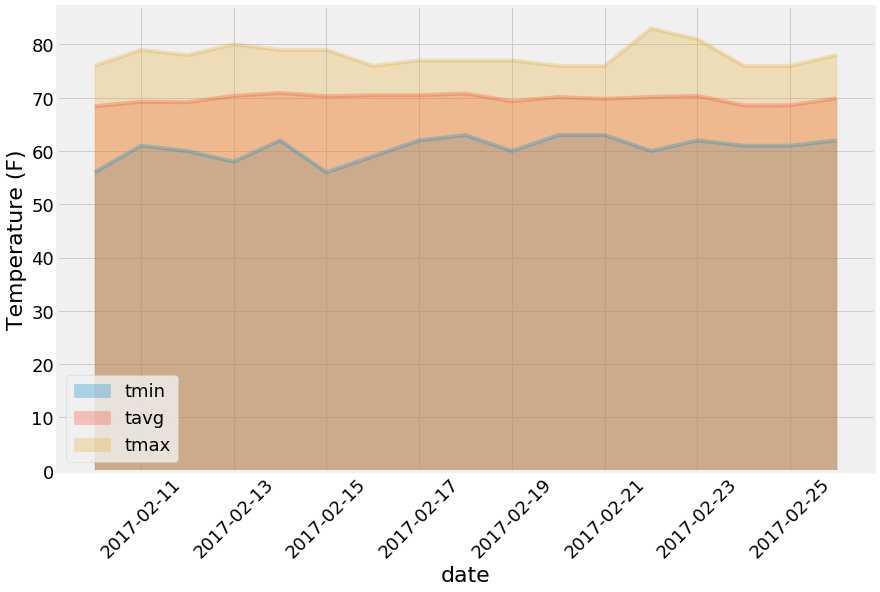

In [43]:
# Plot the daily normals as an area plot with `stacked=False`
df_normals.plot(kind='area', stacked=False, figsize=(12,8), alpha=0.3, fontsize=18)
plt.legend(loc=3, fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('date', fontsize=22)
plt.ylabel('Temperature (F)', fontsize=22)
